In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTENC  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV

In [2]:
pd.get_option('display.max_columns')

20

In [3]:
df = pd.read_csv(r"warranty_data.csv")

In [4]:
df.head() 

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,7957,North East,Assam,Rural,Guwhati,Personal,Household,AC,0,1,...,0,0,0,4474.0,12,202,Manufacturer,30.0,Claim,0
1,1396,East,Delhi,Urban,New Delhi,Personal,Entertainment,TV,0,0,...,1,1,1,25000.0,13,60,Dealer,1.3,Complaint,0
2,7582,West,Andhra Pradesh,Rural,Hyderabad,Business,Household,AC,0,0,...,0,0,0,10000.0,12,3,Dealer,2.5,Claim,0
3,5824,West,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,0,0,...,1,1,0,4216.0,10,672,Dealer,25.0,Other,0
4,4086,South West,Kerala,Rural,Kochi,Business,Household,AC,0,0,...,0,0,0,20000.0,13,3,Manufacturer,6.5,Claim,0


In [5]:
df.Fraud.value_counts()

0    7675
1     666
Name: Fraud, dtype: int64

In [6]:
df.isna().sum() 

Unnamed: 0            0
Region                0
State                 0
Area                  0
City                  0
Consumer_profile      0
Product_category      0
Product_type          0
AC_1001_Issue         0
AC_1002_Issue         0
AC_1003_Issue         0
TV_2001_Issue         0
TV_2002_Issue         0
TV_2003_Issue         0
Claim_Value         240
Service_Centre        0
Product_Age           0
Purchased_from        0
Call_details          0
Purpose               0
Fraud                 0
dtype: int64

In [7]:
df = df[-df.Claim_Value.isna()]

In [8]:
df.Service_Centre.value_counts() # Since categorical I will replace with letter for better understanding

15    1916
12    1726
13    1529
10    1338
14    1239
11     322
16      31
Name: Service_Centre, dtype: int64

In [9]:
df.loc[df['Service_Centre'] == 10, 'Service_Cat'] = 'A'
df.loc[df['Service_Centre'] == 11, 'Service_Cat'] = 'B'
df.loc[df['Service_Centre'] == 12, 'Service_Cat'] = 'C'
df.loc[df['Service_Centre'] == 13, 'Service_Cat'] = 'D'
df.loc[df['Service_Centre'] == 14, 'Service_Cat'] = 'E'
df.loc[df['Service_Centre'] == 15, 'Service_Cat'] = 'F'
df.loc[df['Service_Centre'] == 16, 'Service_Cat'] = 'G'

In [10]:
df.drop(columns="Service_Centre", inplace= True )

In [11]:
df.columns

Index(['Unnamed: 0', 'Region', 'State', 'Area', 'City', 'Consumer_profile',
       'Product_category', 'Product_type', 'AC_1001_Issue', 'AC_1002_Issue',
       'AC_1003_Issue', 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue',
       'Claim_Value', 'Product_Age', 'Purchased_from', 'Call_details',
       'Purpose', 'Fraud', 'Service_Cat'],
      dtype='object')

In [12]:
# Making dummy cols for categorical data
df = pd.get_dummies(df)
tester = df.drop(columns=["Unnamed: 0", "Fraud"], axis= 1)
for i in range(len(tester.columns)):
        print(f"{i}: {tester.columns[i]}")

0: AC_1001_Issue
1: AC_1002_Issue
2: AC_1003_Issue
3: TV_2001_Issue
4: TV_2002_Issue
5: TV_2003_Issue
6: Claim_Value
7: Product_Age
8: Call_details
9: Region_East
10: Region_North
11: Region_North East
12: Region_North West
13: Region_South
14: Region_South East
15: Region_South West
16: Region_West
17: State_Andhra Pradesh
18: State_Assam
19: State_Bihar
20: State_Delhi
21: State_Goa
22: State_Gujarat
23: State_HP
24: State_Haryana
25: State_J&K
26: State_Jharkhand
27: State_Karnataka
28: State_Kerala
29: State_MP
30: State_Maharshtra
31: State_Odisha
32: State_Rajasthan
33: State_Tamilnadu
34: State_Telengana
35: State_Tripura
36: State_UP
37: State_Uttar Pradesh
38: State_West Bengal
39: Area_Rural
40: Area_Urban
41: City_Agartala
42: City_Ahmedabad
43: City_Bangalore
44: City_Bhopal
45: City_Bhubaneswar
46: City_Chandigarh
47: City_Chennai
48: City_Delhi
49: City_Guwhati
50: City_Hyderabad
51: City_Jaipur
52: City_Kochi
53: City_Kolkata
54: City_Lucknow
55: City_Meerut
56: City_Mum

In [13]:
l1 = list(range(0,87))
for i in range(len(l1)):
    print(l1[i], end = ", ")

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 

In [14]:
df.Claim_Value.isna().sum()

0

In [15]:
X = df.drop(columns=["Unnamed: 0", "Fraud"], axis= 1)
y = df["Fraud"]
print(f"Before : {X.shape}, {y.shape}")
#sns.countplot(data=y, x = 'Fraud')
plt.show()
#print(y.value_counts())

s1 = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86], random_state=69)
X,y = s1.fit_resample(X,y)


print("\n", "\n")
print(f"After : {X.shape}, {y.shape}")
print(y.value_counts())
#sns.countplot(data = y, x = "Fraud")



# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=69, shuffle= True, test_size=0.25)


Before : (8101, 87), (8101,)

 

After : (14870, 87), (14870,)
0    7435
1    7435
Name: Fraud, dtype: int64


In [16]:
s1 = StandardScaler()
#X_train['Claim_Value'] = s1.fit_transform(X_train['Claim_Value'].values.reshape(-1,1))
#X_train['Product_Age'] = s1.fit_transform(X_train['Product_Age'].values.reshape(-1,1))
#X_train['Call_details'] = s1.fit_transform(X_train['Call_details'].values.reshape(-1,1))

# Now I have fit and transformed training data. now just transform the test data
#X_test['Claim_Value'] = s1.fit(X_test['Claim_Value'].values.reshape(-1,1))
#X_test['Product_Age'] = s1.fit(X_test['Product_Age'].values.reshape(-1,1))
#X_test['Call_details'] = s1.fit(X_test['Call_details'].values.reshape(-1,1))


# So scale data not necessary for decision tree

In [17]:
# Now data is balanced so taking the values and reshaping
X = X.values
y = y.values
y = y.reshape(-1,1)

In [18]:
print(X.shape)
print(y.shape)

(14870, 87)
(14870, 1)


In [19]:
#X_train = X_train.values
#X_test = X_test.values
#y_train = y_train.values
#y_test = y_test.values

In [20]:
y_test.sum()

1853

In [21]:
temp = df.corr()
temp.loc[:,"Fraud"].sort_values()

Purchased_from_Dealer         -0.175432
Purchased_from_Internet       -0.135681
AC_1002_Issue                 -0.108165
Product_Age                   -0.090013
Region_North West             -0.088473
                                 ...   
Claim_Value                    0.141641
City_Guwhati                   0.148648
State_Assam                    0.148648
Purchased_from_Manufacturer    0.296648
Fraud                          1.000000
Name: Fraud, Length: 89, dtype: float64

## Data is prepared to be put in model 

[0.82140936 0.81226466 0.81979559 0.81764389 0.79224973 0.80624327]
[0.95857988 0.96880043 0.9612695  0.97471759 0.97255113 0.96770721]
[0.96826251 0.96933835 0.96826251 0.98063475 0.97362756 0.96932185]


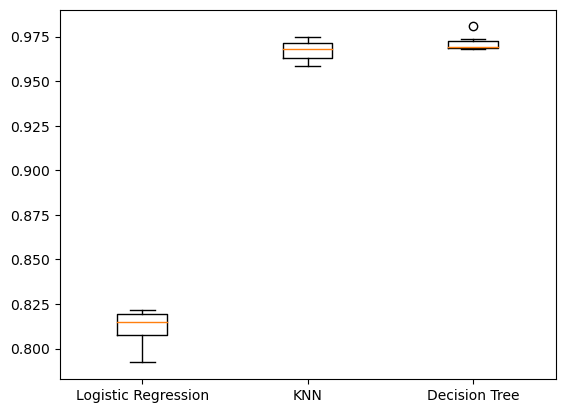

In [22]:
# I will evaluae performance of 3 models
models = {"Logistic Regression" : LogisticRegression(), "KNN" : KNeighborsClassifier(), "Decision Tree" : DecisionTreeClassifier()}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=69, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kf)
    results.append(cv_results)
for i in results:
    print(i)
plt.boxplot(results, labels = models.keys())
plt.show()

In [23]:
# So decision tree fits so well that I dont need to do hyperparamter tuning. now checking score on test set
for name, model in models.items():
    model.fit(X_train,y_train)
    model_score = model.score(X_test,y_test)
    print(f"{name}:{model_score}")

Logistic Regression:0.8227541689080151
KNN:0.9725658956428187
Decision Tree:0.9747175901022055
